# Visualizing 4D nifty file:

In [1]:
%matplotlib inline
from nilearn import plotting
from nilearn import image
from pathlib import Path, PurePath
import itertools
import nmmn.plots

### Getting data

In [2]:
labels = ['motor', 'social', 'wm', 'gambling']
datapath = '../DATA/cneuromod/hcptrt/sub-01'
func = 'space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz'
scans_idx = []

for l in labels:
    scans = sorted(Path(datapath).rglob('*_task-{}*{}'.format(l, func)))
    scans = [str(s) for s in scans]
    scans_idx.append(scans)

scans_idx = list(itertools.chain(*scans_idx))
# len(scans_idx)

In [3]:
# Loading into the memory to print its shape (4D nifti file)
t_scans_idx = []

for label in labels:
    t_scan = sorted(Path(datapath).rglob('*_ses-001_task-{}*{}'
                                         .format(label, func)))
    t_scan = [str(s) for s in t_scan]
    t_scans_idx.append(t_scan)

t_scans_idx = list(itertools.chain(*t_scans_idx))
# x = len(t_scans_idx)
# for i in range (x):
#     print('', image.load_img(t_scans_idx[i]).shape)

print(t_scans_idx)
    
for t, l in zip(t_scans_idx, labels):
    print(l,':', image.load_img(t).shape)

['../DATA/cneuromod/hcptrt/sub-01/sub-01_ses-001_task-motor_run-1_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz', '../DATA/cneuromod/hcptrt/sub-01/sub-01_ses-001_task-social_run-1_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz', '../DATA/cneuromod/hcptrt/sub-01/sub-01_ses-001_task-wm_run-1_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz', '../DATA/cneuromod/hcptrt/sub-01/sub-01_ses-001_task-gambling_run-1_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz']
motor : (97, 115, 97, 144)
social : (97, 115, 97, 139)
wm : (97, 115, 97, 202)
gambling : (97, 115, 97, 129)


In [4]:
for t, l in zip(t_scans_idx, labels):
    f_t = image.index_img(t, 0)
    print(l, ':', f_t.shape)

motor : (97, 115, 97)
social : (97, 115, 97)
wm : (97, 115, 97)
gambling : (97, 115, 97)


### Visualizing one volume in a 4D file

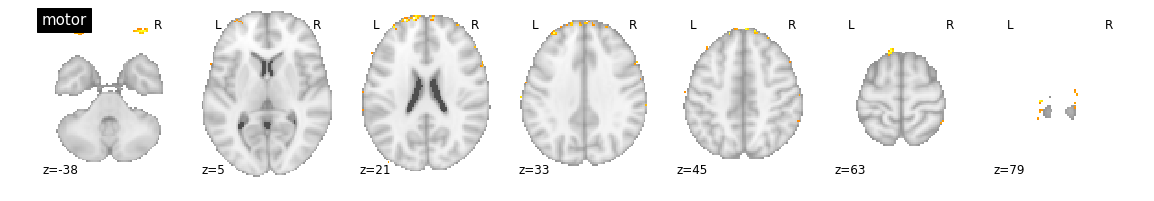

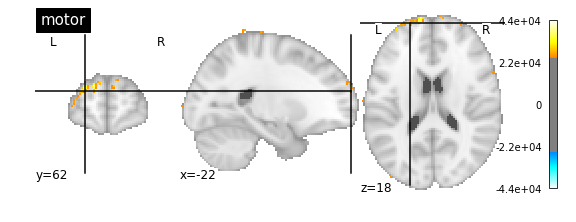

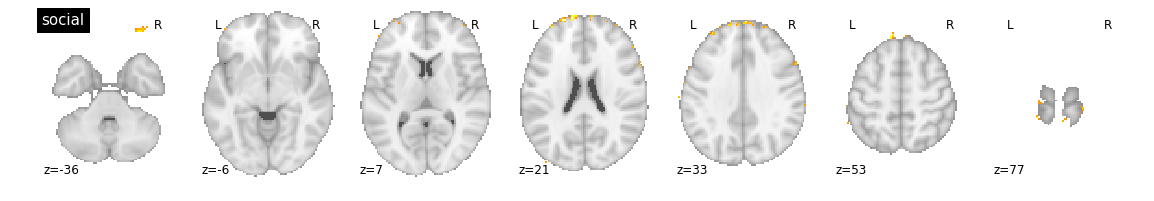

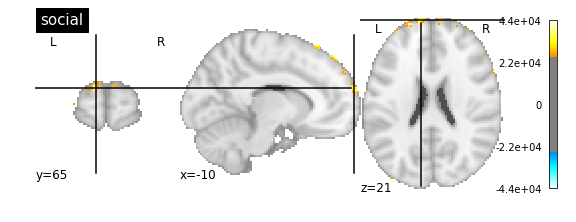

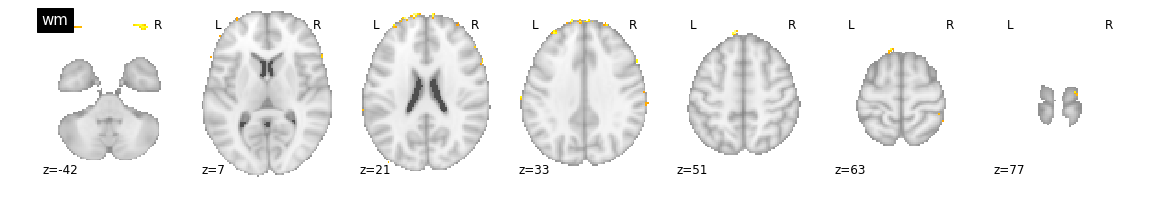

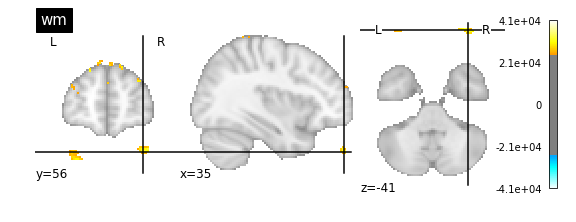

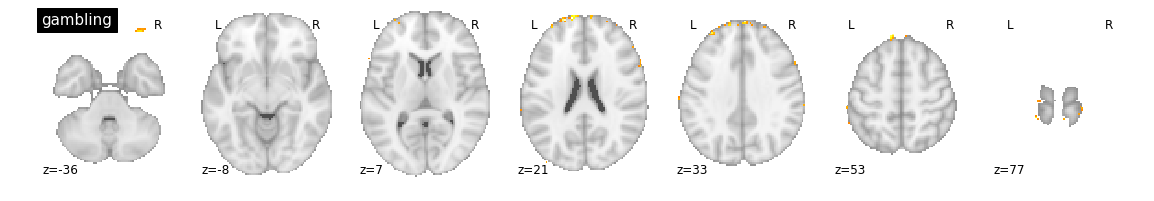

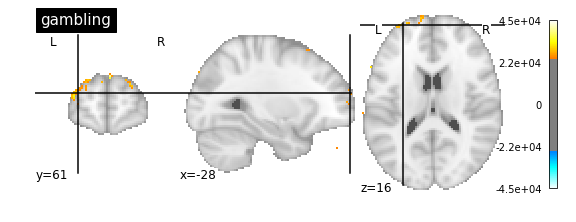

In [5]:
# First_mt is a 3D image that we can easily visualize as a statistical map:
# turbo=nmmn.plots.turbocmap() # Turbo
for t, l in zip(t_scans_idx, labels):
    
    plotting.plot_stat_map(image.index_img(t, 0), title=l,
                           threshold=2.5e+04, display_mode="z",
                           colorbar=False)   
    plotting.plot_stat_map(image.index_img(t, 0),
                           title=l, colorbar=True, threshold=2.5e+04)
    
#     plotting.plot_glass_brain(image.index_img(t, 0), title=l,
#                               colorbar=True, threshold=1.2e+04, 
#                               black_bg=True, plot_abs=False)

### Looping through selected volumes in a 4D file

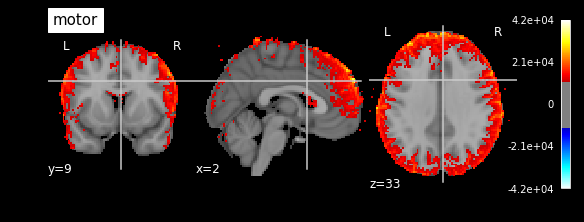

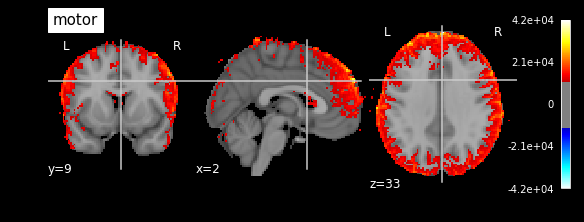

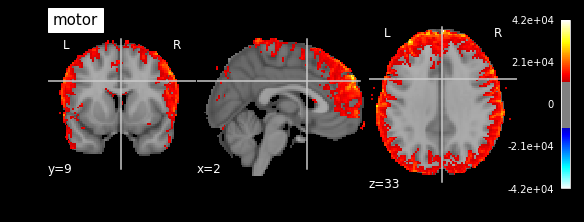

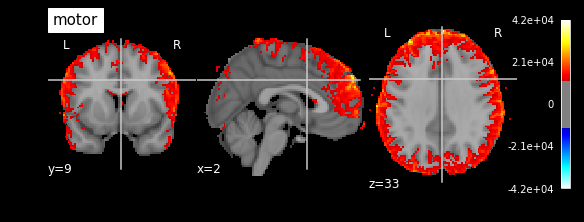

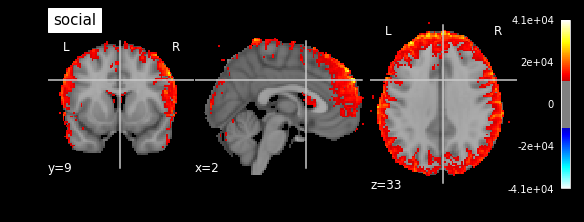

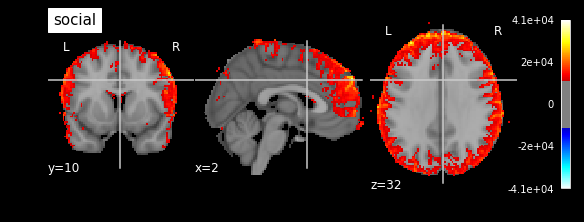

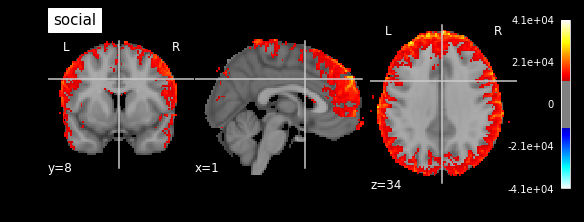

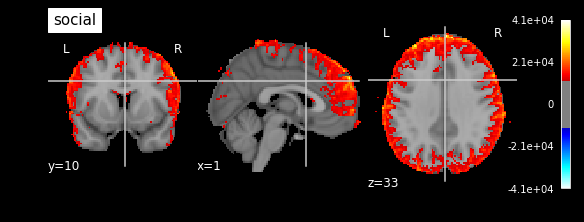

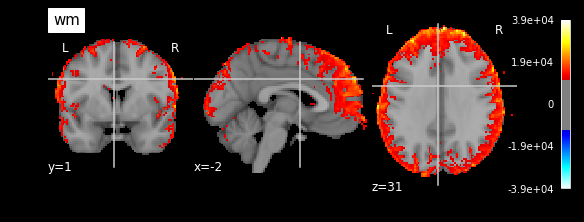

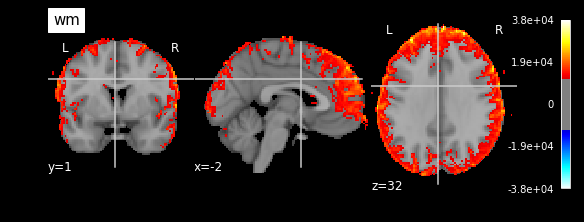

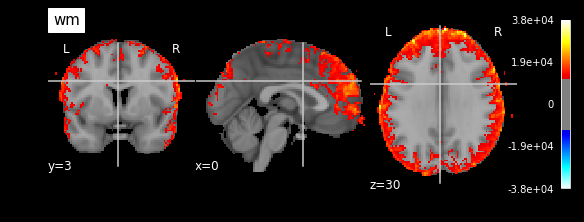

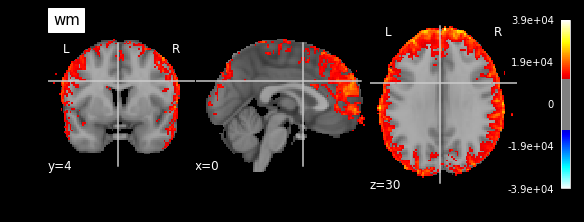

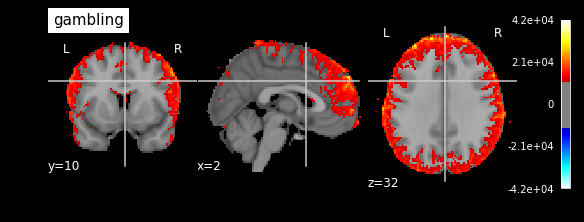

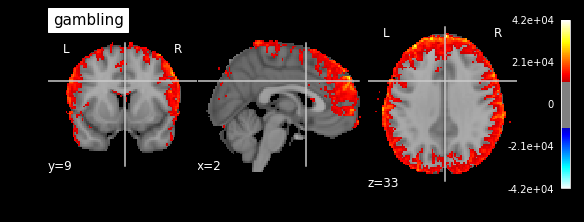

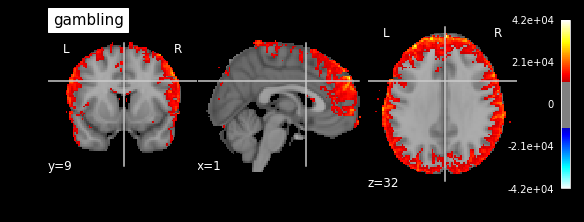

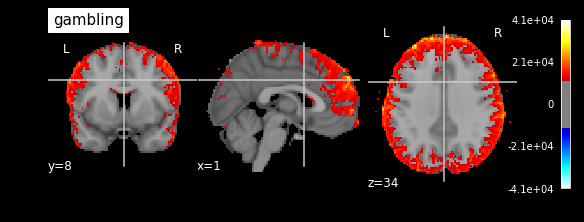

In [6]:
for t, l in zip(t_scans_idx, labels):
    selected_volumes_1 = image.index_img(t, slice(9, 11))
    selected_volumes_2 = image.index_img(t, slice(99, 101))
    
    for img_1 in image.iter_img(selected_volumes_1):
        plotting.plot_stat_map(img_1, title=l,
                       threshold=1.2e+04, black_bg=True) 
    for img_2 in image.iter_img(selected_volumes_2):
        plotting.plot_stat_map(img_2, title=l,
                       threshold=1.2e+04, black_bg=True) 
        
# for t, l in zip(t_scans_idx, labels):
    
#     plotting.plot_stat_map(image.index_img(t, 0), title=l,
#                            threshold=1.2e+04, black_bg=True, 
#                            display_mode="z")        